# Roback Computational Problem
**Kyle Hood (JHU)**  
**Urban Economics, Fall 2025**  

In this problem, we will use Python to graphically display the canonical Roback graphs.

## Setup

For this problem, you should turn in one file of Python code. You have two choices for how to submit your answers to the questions in that file:
1. Embedded in the Python code by using the `print()` function
2. In comments of the program file.

For these problems, you should use the utility and cost functions from Brueckner’s problem 11.1. You can normalize consumers’ level of utility to 1 and the price of the export good to 1.

## Question I: Deriving Curves
1. Derive the curve mathematically (use your answers from Brueckner 11.1!)
    a. Write down the equation describing residents’ indifference curve (e.g., p as a function of y, a).
    b. Write down the equation describing firms’ isoprofit curve (e.g., p as a function of y, a, and θ).
2. Make a function:
    a. Called `p_resident_func` that takes y and a as inputs, and returns p
    b. Called `p_firm_func` that takes y, a, and theta as inputs, and returns p

## Question II: Indifference Points
1. Using the functions you generated
    a. Compute the land price at which an individual would obtain a utility of 1, if her income is 2 and there are 2 “units” of amenity.
    b. Compute the land price at which a firm earns zero profits, if wages are 2, and amenities don’t impact production.
2. Do the same calculation if wages (income) are 4.
3. Do the same calculation if wages (income) are 1.26.

## Question III: Plotting Equilibrium
For theta equals -0.1, 0, and 0.1, plot firm and household indifference curves for a = 1 and a = 1.5.
Each theta value should be on its own graph. Each of these should be labeled with the appropriate value of theta in the title. Also, each curve where a = 1 should be a solid line and each curve where a = 1.5 should be a dotted line.

Plot the firm curve in blue and the household curve in red. All of your graphs should range from 1 to 4 on the x axis.

To make this easier for you, here is the code necessary to do this for theta = 0.1:

```python
import numpy as np
import matplotlib.pyplot as plt

theta = 0.1
a = 1
y = np.arange(1, 4.01, 0.01)
plt.plot(y, p_firm_func(y, a, theta), color='blue', label='Firm, a=1')
plt.plot(y, p_resident_func(y, a), color='red', label='Resident, a=1')

a = 1.5
plt.plot(y, p_firm_func(y, a, theta), color='blue', linestyle='dotted', label='Firm, a=1.5')
plt.plot(y, p_resident_func(y, a), color='red', linestyle='dotted', label='Resident, a=1.5')

plt.title('theta = 0.1')
plt.xlabel('y')
plt.ylabel('p')
plt.legend()
plt.show()
```

To sum up, in your code you should have three plots, each of which should have 4 curves on it: firm and household curves for a = 1 and firm and household curves for a = 1.5.

## Question IV: Interpretation
For each of the cases graphed above, state whether equilibrium land prices and wages increase or decrease after a change in amenities from 1 to 1.5. Please explain your answers by reference to Brueckner chapter 11.2.

# Solution Question I.1

**Resident indifference curve**

The resident indifference curve is derived from the indirect utility function:

$$
\bar{u} = \frac{y}{2} \left( \frac{a}{p} \right)^{1/2}.
$$

Solving for $p$:

$$
\bar{u}^2 = \frac{y^2 a}{4p}
$$

$$
p = \frac{a y^2}{4 \bar{u}^2}.
$$

If $\bar{u} = 1$, this simplifies to:

$$
p = \frac{a y^2}{4}.
$$

---

**Firm zero-profit condition**

$$
p^{1/2} y^{1/2} a^{-\theta} = 1.
$$

Solving for $p$:

$$
p y a^{-2\theta} = 1
$$

$$
p = \frac{a^{2\theta}}{y}.
$$

# Question I: Deriving Curves
2. Make a function: 
    a. Called `p_resident_func` that takes y and a as inputs, and returns p. 
    b. Called `p_firm_func` that takes y, a, and theta as inputs, and returns p.

In [1]:
# Question I.2: Deriving Curves
from typing import Literal, Callable
import numpy as np

# Residents’ indifference curve-- part c
# p: price (of real estate), a: amenities, y: income, ubar: utility level
def p_resident_func(y: float | np.ndarray,
                    a: float | np.ndarray,
                    ubar: float = 1.0) -> float | np.ndarray:
    return (a * y**2) / (4.0 * ubar**2)

# Firms’ isoprofit curve-- part e
# p: price (of real estate), a: amenities, y: income (price of labor), theta: elasticity of output w.r.t. amenities
def p_firm_func(y: float | np.ndarray,
                a: float | np.ndarray,
                theta: float | np.ndarray) -> float | np.ndarray:
    return (a**(2.0 * theta)) / y

# Define a type for the economy, which can be either "firm" or "resident."
economy = Literal["firm", "resident"]
# Helper function to select the appropriate price function based on the economy type
def price_func(econ: economy) -> Callable:
    if econ == "firm":
        return p_firm_func
    elif econ == "resident":
        return p_resident_func
    else:
        raise ValueError("economy must be 'firm' or 'resident'")

In [8]:
import numpy as np
import pandas as pd

def generate_data(
    economy_side: economy,
    *,
    a_series: np.ndarray | None = None,
    theta_series: np.ndarray | None = None,
    y_series: np.ndarray | None = None,
    ubar: float = 1.0,
) -> pd.DataFrame:
    
    pfunc = price_func(economy_side)   # <- using your selector name

    if a_series is None:
        a_series = np.linspace(0.1, 10.0, 60)
    if y_series is None:
        y_series = np.linspace(1.0, 10.0, 60)

    if economy_side == "firm":
        if theta_series is None:
            theta_series = np.linspace(-1.0, 1.0, 60)

        # 3D grid
        A = a_series[None, None, :]        # (1, 1, na)
        T = theta_series[None, :, None]    # (1, nt, 1)
        Y = y_series[:, None, None]        # (ny, 1, 1)

        P = pfunc(y=Y, a=A, theta=T)       # (ny, nt, na)

        df = pd.DataFrame({
            "a": np.broadcast_to(A, P.shape).ravel(),
            "y": np.broadcast_to(Y, P.shape).ravel(),
            "theta": np.broadcast_to(T, P.shape).ravel(),
            "p_firm": P.ravel(),
        })
        return df

    elif economy_side == "resident":
        # 2D grid (no theta)
        A = a_series[None, :]              # (1, na)
        Y = y_series[:, None]              # (ny, 1)

        P = pfunc(y=Y, a=A, ubar=ubar)     # (ny, na)

        df = pd.DataFrame({
            "a": np.broadcast_to(A, P.shape).ravel(),
            "y": np.broadcast_to(Y, P.shape).ravel(),
            "u_bar": ubar,
            "p_resident": P.ravel(),
        })
        return df

    else:
        raise ValueError("economy_side must be 'firm' or 'resident'")

#-----------------------------
df_firm = generate_data("firm")
df_resident = generate_data("resident")

df_firm.head(), df_firm.shape, '-'*35, df_resident.head(), df_resident.shape


(          a    y  theta      p_firm
 0  0.100000  1.0   -1.0  100.000000
 1  0.267797  1.0   -1.0   13.944079
 2  0.435593  1.0   -1.0    5.270330
 3  0.603390  1.0   -1.0    2.746654
 4  0.771186  1.0   -1.0    1.681439,
 (216000, 4),
 '-----------------------------------',
           a    y  u_bar  p_resident
 0  0.100000  1.0    1.0    0.025000
 1  0.267797  1.0    1.0    0.066949
 2  0.435593  1.0    1.0    0.108898
 3  0.603390  1.0    1.0    0.150847
 4  0.771186  1.0    1.0    0.192797,
 (3600, 4))

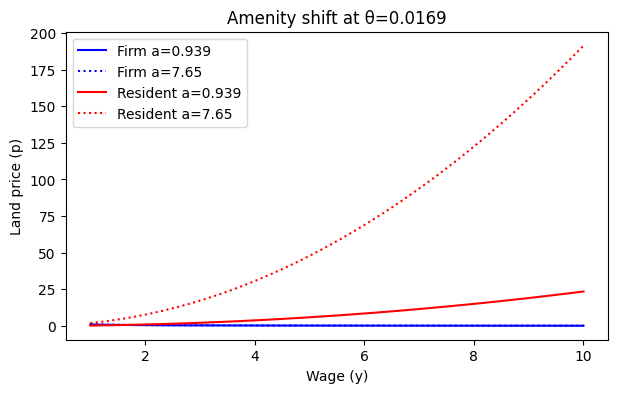

In [9]:
import matplotlib.pyplot as plt
def roback_shift_plot(df_firm, df_resident, *, theta_val, a1, a2):
    firm1 = df_firm[np.isclose(df_firm["a"], a1) & np.isclose(df_firm["theta"], theta_val)].sort_values("y")
    firm2 = df_firm[np.isclose(df_firm["a"], a2) & np.isclose(df_firm["theta"], theta_val)].sort_values("y")
    res1  = df_resident[np.isclose(df_resident["a"], a1)].sort_values("y")
    res2  = df_resident[np.isclose(df_resident["a"], a2)].sort_values("y")

    plt.figure(figsize=(7,4))
    plt.plot(firm1["y"], firm1["p_firm"], color="blue", linestyle="-", label=f"Firm a={a1:.3g}")
    plt.plot(firm2["y"], firm2["p_firm"], color="blue", linestyle=":", label=f"Firm a={a2:.3g}")
    plt.plot(res1["y"], res1["p_resident"], color="red", linestyle="-", label=f"Resident a={a1:.3g}")
    plt.plot(res2["y"], res2["p_resident"], color="red", linestyle=":", label=f"Resident a={a2:.3g}")

    plt.xlabel("Wage (y)")
    plt.ylabel("Land price (p)")
    plt.title(f"Amenity shift at θ={theta_val:.3g}")
    plt.legend()
    plt.show()

theta_val = df_firm["theta"].unique()[30]
a1 = df_firm["a"].unique()[5]
a2 = df_firm["a"].unique()[45]

roback_shift_plot(df_firm, df_resident, theta_val=theta_val, a1=a1, a2=a2)


The above roback shift plot shows what happens to wages and price at two different amenity levels, 0.939 and 7.65 with a theta of 0.0169. At this level of elasticity amenities barely impacts firms, recall the equation for firm price:
$$
a^{2\theta} = e^{2\theta \ln(a)}
$$

which is very small even when $a$ increases substantially.
Therefore,
$$
a^{2\theta} \approx 1,
$$

and the firm curve barely shifts with amenities.

## Question II: Indifference Points
1. Using the functions you generated
   
    a. Compute the land price at which an individual would obtain a utility of 1, if her income is 2 and there are 2 “units” of amenity.
    
    b. Compute the land price at which a firm earns zero profits, if wages are 2, and amenities don’t impact production.
2. Do the same calculation if wages (income) are 4.
3. Do the same calculation if wages (income) are 1.26.

In [24]:
# Question II: Indifference Points
# Set a and theta
a = 2.0      # amenities
ubar = 1.0   # utility level
theta = 0.0  # elasticity of output w.r.t. amenities

# compute land price for y=2 for individual utility = 1 and profits = 0
#y=2, a=2, ubar=1, theta=0
land_resident_price_2_2_1 = p_resident_func(y=2, a=a, ubar=ubar)
print(f"land resident price for y=2, a=2, and ubar=1 is {land_resident_price_2_2_1:4f}")
land_firm_price_2_2_0     = p_firm_func(y=2, a=2, theta=0)
print(f"land firm price for y=2, a=2, and theta=0 is {land_firm_price_2_2_0:4f}")
print()

# compute land price for y=4 for individual utility = 1 and profits = 0
#y=4, a=2, ubar=1, theta=0
land_resident_price_4_2_1 = p_resident_func(y=4, a=a, ubar=ubar)
print(f"land resident price for y=4, a=2, and ubar=1 is {land_resident_price_4_2_1:4f}")
land_firm_price_4_2_0     = p_firm_func(y=4, a=2, theta=0)
print(f"land firm price for y=4, a=2, and theta=0 is {land_firm_price_4_2_0:4f}")
print()

# compute land price for y=1.26 for individual utility = 1 and profits = 0
#y=1.26, a=2, ubar=1, theta=0
land_resident_price_1_26_2_1 = p_resident_func(y=1.26, a=a, ubar=ubar)
print(f"land resident price for y=1.26, a=2, and ubar=1 is {land_resident_price_1_26_2_1:4f}")
land_firm_price_1_26_2_0     = p_firm_func(y=1.26, a=a, theta=theta)
print(f"land firm price for y=1.26, a=2, and theta=0 is {land_firm_price_1_26_2_0:4f}")
print()

land resident price for y=2, a=2, and ubar=1 is 2.000000
land firm price for y=2, a=2, and theta=0 is 0.500000

land resident price for y=4, a=2, and ubar=1 is 8.000000
land firm price for y=4, a=2, and theta=0 is 0.250000

land resident price for y=1.26, a=2, and ubar=1 is 0.793800
land firm price for y=1.26, a=2, and theta=0 is 0.793651



## Question III: Plotting Equilibrium
For theta equals -0.1, 0, and 0.1, plot firm and household indifference curves for a = 1 and a = 1.5.
Each theta value should be on its own graph. Each of these should be labeled with the appropriate value of theta in the title. Also, each curve where a = 1 should be a solid line and each curve where a = 1.5 should be a dotted line.

Plot the firm curve in blue and the household curve in red. All of your graphs should range from 1 to 4 on the x axis.

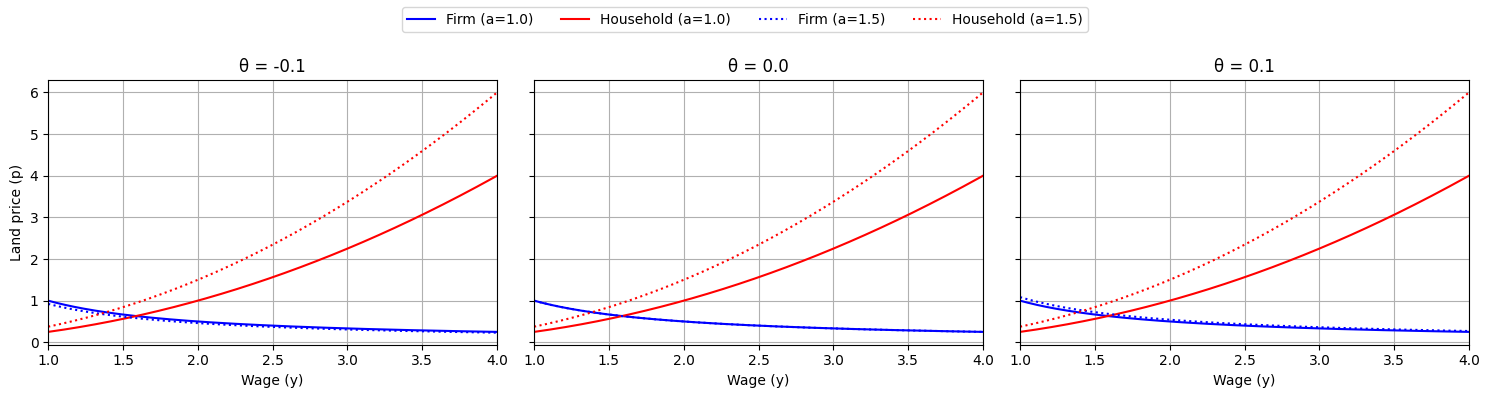

In [13]:
# Question III: Plotting Equilibrium
# import necessary libraries
import numpy as np
import matplotlib.pyplot as plt

# set parameters and range for a
thetas = [-0.1, 0.0, 0.1]
a_vals = [1.0, 1.5]
y_grid = np.linspace(1.0, 4.0, 400)   # x-axis range 1 to 4

ubar = 1.0

# --- create subplots ---
fig, axs = plt.subplots(1, len(thetas), figsize=(15,4), sharey=True)

# Plotting the curves for different values of theta and a
for i, theta in enumerate(thetas):
    
    ax = axs[i]

    for a in a_vals:
        ls = "-" if a == 1.0 else ":"  # solid for a=1, dotted for a=1.5

        # compute curves
        p_firm = p_firm_func(y=y_grid, a=a, theta=theta)
        p_res  = p_resident_func(y=y_grid, a=a, ubar=ubar)

        # Firm in blue
        ax.plot(y_grid, p_firm,
                color="blue",
                linestyle=ls,
                label=f"Firm (a={a})")

        # Household in red
        ax.plot(y_grid, p_res,
                color="red",
                linestyle=ls,
                label=f"Household (a={a})")
        
        ax.set_xlim(1, 4)
        ax.set_xlabel("Wage (y)")
        ax.set_title(f"θ = {theta}")
        ax.grid(True)
        
axs[0].set_ylabel("Land price (p)")

handles, labels = axs[0].get_legend_handles_labels()
fig.legend(handles, labels, loc="upper center", ncol=4)

plt.tight_layout(rect=[0, 0, 1, 0.9])
plt.show()

# Question IV: Interpretation
For each of the cases graphed above, state whether equilibrium land prices and wages increase or decrease after a change in amenities from 1 to 1.5. Please explain your answers by reference to Brueckner chapter 11.2.?

For each θ:
- Household curve 
  - shifts up (red dotted above red solid)
  - Higher amenities increase utility, so rents must rise at any given wage.
    
- Firm curve:
  - θ = −0.1 → blue dotted shifts down (amenities raise costs)
  - θ = 0 → blue curves overlap (amenities don’t affect production)
  - θ = 0.1 → blue dotted shifts up (amenities reduce costs)
    
For θ = −0.1 and 0 → intersection moves to:
- higher p
- lower y
For θ = 0.1:
- drop is smaller, reversing if θ were > 0.5


As θ increases from −0.1 → 0 → 0.1:
- The firm curve becomes less steep
- The wage effect becomes less negative
- The rent increase becomes stronger